## Softmax Classification (input : 2, class : 3) : PyTorch

In [93]:
import torch 
import torch.nn as nn

import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### plot the data

In [94]:
def plot_scatter(X, y):
    # 마커와 컬러맵을 준비합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 클래스 샘플을 표시합니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap.colors[idx],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

### plot the decision boundary

In [95]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    x_test = torch.FloatTensor([xx1.ravel(), xx2.ravel()]).transpose(0, 1)
    with torch.no_grad():
      y_pred = model(x_test)  # predicted output

    prediction = y_pred.argmax(1)
    Z = prediction.view(xx1.shape)

    print(xx1.shape, Z.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    plot_scatter(X, y)

### Step 1. Data (Generation, Plot)

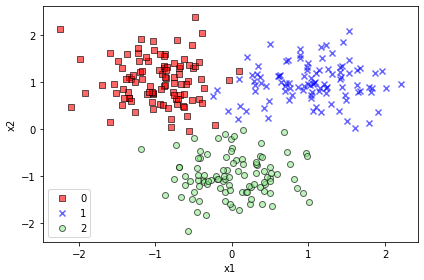

In [96]:
m1 = [-1, 1]
cov1 = [[0.2, 0],[0, 0.2]]

m2 = [1, 1]
m3 = [0, -1]

x1 = np.random.multivariate_normal(m1, cov1, 100)
x2 = np.random.multivariate_normal(m2, cov1, 100)
x3 = np.random.multivariate_normal(m3, cov1, 100)
x_data = np.concatenate((x1, x2), axis=0)
x_data = np.concatenate((x_data, x3), axis=0)

y1 = np.ones((100, ), dtype='i')-1
y2 = 2*np.ones((100, ), dtype='i')-1
y3 = 3*np.ones((100, ), dtype='i')-1
y = np.concatenate((y1, y2), axis=0)
y = np.concatenate((y, y3), axis=0)

plot_scatter(x_data, y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [97]:
x_data = torch.Tensor(x_data)
y_data = torch.LongTensor(y)

print(x_data.dim(), x_data.shape)
print(y_data.dim(), y_data.shape)

2 torch.Size([300, 2])
1 torch.Size([300])


### Step 2. Softmax Classification Model (input = 2, output = 3 with softmax function)

In [98]:
nb_classes = 3

class SoftmaxClassificationModel(torch.nn.Module):
    def __init__(self):
        super(SoftmaxClassificationModel,self).__init__()
        self.model = nn.Sequential(
          nn.Linear(2, 3),
          # nn.Softmax() is not used here because CrossEntropLoss combines LogSoftmax and NLLLoss in one single class
        )
    def forward(self,x):
        y_pred = self.model(x)
        return y_pred

model = SoftmaxClassificationModel()

### Step 3. Loss,Optimizer, Metric

In [99]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

### Step 4. Train the model

In [100]:
epochs = 2000
cost = []
acc = []
for epoch in range(epochs):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    cost.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    prediction = y_pred.argmax(1)
    correct_prediction = prediction == y_data
    accuracy = correct_prediction.sum().item() / len(correct_prediction)
    acc.append(accuracy)
      
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, epochs, loss.item(), accuracy * 100,
        ))

Epoch    0/2000 Cost: 1.691922 Accuracy 3.33%
Epoch  100/2000 Cost: 0.216532 Accuracy 98.00%
Epoch  200/2000 Cost: 0.144445 Accuracy 98.33%
Epoch  300/2000 Cost: 0.117532 Accuracy 98.00%
Epoch  400/2000 Cost: 0.102874 Accuracy 98.00%
Epoch  500/2000 Cost: 0.093444 Accuracy 98.00%
Epoch  600/2000 Cost: 0.086773 Accuracy 97.67%
Epoch  700/2000 Cost: 0.081755 Accuracy 97.67%
Epoch  800/2000 Cost: 0.077814 Accuracy 97.67%
Epoch  900/2000 Cost: 0.074619 Accuracy 97.67%
Epoch 1000/2000 Cost: 0.071965 Accuracy 98.00%
Epoch 1100/2000 Cost: 0.069716 Accuracy 98.00%
Epoch 1200/2000 Cost: 0.067780 Accuracy 98.00%
Epoch 1300/2000 Cost: 0.066091 Accuracy 98.00%
Epoch 1400/2000 Cost: 0.064601 Accuracy 98.00%
Epoch 1500/2000 Cost: 0.063275 Accuracy 98.00%
Epoch 1600/2000 Cost: 0.062085 Accuracy 97.67%
Epoch 1700/2000 Cost: 0.061009 Accuracy 97.67%
Epoch 1800/2000 Cost: 0.060030 Accuracy 97.67%
Epoch 1900/2000 Cost: 0.059134 Accuracy 97.67%


Print the updated weight W and bias b

In [101]:
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[-3.4812,  2.0258],
        [ 2.6143,  1.9345],
        [-0.0123, -4.0592]], requires_grad=True)
Parameter containing:
tensor([-0.8112, -0.3141,  0.9103], requires_grad=True)


### Plot the Training loss

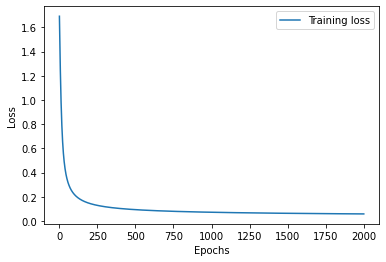

In [102]:
epochs = np.arange(1, epochs+1)
plt.plot(epochs, cost, label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plot the Training Accuracy

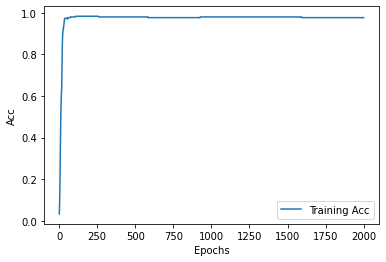

In [103]:
plt.clf()   # 그래프를 초기화합니다
plt.plot(epochs, acc, label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

### Step 5. Test : Plot the Decision Boundary

(328, 323) torch.Size([328, 323])


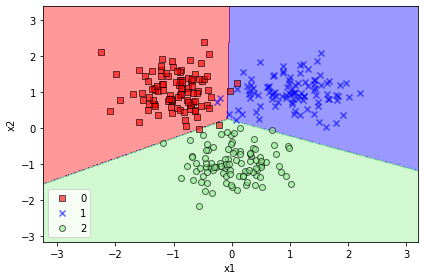

In [104]:
plot_decision_regions(x_data, y, model)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()